Let's consider a harmonic oscillator with weakly linear damping:
$$
x'' + \epsilon x'+ \omega_0^2 x = 0 \\ \tag{1}
$$
where $\epsilon = 0.01$ and $\omega_0 = \sqrt{2}$  

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 8)
mpl.rc('mathtext',fontset = 'stix')

mpl.rc('xtick', labelsize=4)
mpl.rc('ytick', labelsize=4)
mpl.rc('axes', labelsize=8)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.5)
mpl.rc('figure', figsize=(3.55/2.54, 2.8/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)


cm_number = 14
cm = plt.cm.get_cmap("Purples")
colors = ["#F9D5DD","#E3738B","#713948"]
Colors = [cm(1. / (cm_number - 1) * i) for i in range(0, cm_number)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Fs = 20
T = 1000
t = np.linspace(0,T,T*Fs)
omega0 = np.sqrt(2)
x0 = [2,0]
epsilon = 1e-2



C:\Users\TengMa\AppData\Local\Temp\ipykernel_24396\1533945760.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("Purples")


# 1. Simulate data and visualization

In [36]:
def WND(x,t):
    dxdt = [x[1], -omega0**2*x[0]-epsilon*(x[1])]
    return dxdt

WND_response = odeint(WND, y0 = x0,t = t)
outputsize = (8/2.54,5/2.54)

length = len(WND_response[:,0])
Observation = WND_response[:,0] 
# fig,ax = plt.subplots()

# ax.set_xticks([])
# ax.set_yticks([])
# # ax.spines["left"].set_color("white")
# # ax.spines["right"].set_color("white")
# # ax.spines["top"].set_color("white")
# # ax.spines["bottom"].set_color("white")
# ax.set_axis_off()
# axins = inset_axes(ax, width="10%", height="100%", loc='center left',
#                    bbox_to_anchor=(0, 0, 1, 1),
#                    bbox_transform=ax.transAxes)
# axins.plot(t, Observation,lw = 0.3,color = "gray",label = "$x'' = -x$")
# axins.set_xlim(0,10)
# axins.set_ylabel(r"$x(t)$")
# axins.set_xticks([])
# axins.set_yticks([])
# axins.set_ylim(-2.5,2.5)

# axins.spines["right"].set_color("white")

# axins = inset_axes(ax, width="10%", height="100%", loc='center left',
#                    bbox_to_anchor=(0.9, 0, 1, 1),
#                    bbox_transform=ax.transAxes)
# axins.plot(t, Observation,lw = 0.4,color = "gray",label = "$x'' = -x$")
# axins.set_xlim(990,1000)
# axins.set_ylim(-2.5,2.5)
# axins.set_xticks([])
# axins.set_yticks([])
# axins.spines["left"].set_color("white")
# axins = inset_axes(ax, width="80%", height="100%", loc='center left',
#                    bbox_to_anchor=(0.1, 0, 1, 1),
#                    bbox_transform=ax.transAxes)
# axins.plot(t, Observation,lw = 0.4,color = "gray",label = "$x'' = -x$")
# axins.set_xlim(10,990)
# axins.set_ylim(-2.5,2.5)
# axins.set_yticks([])
# # axins.set_xticks([250,500,750])
# axins.set_xticks([])
# axins.spines["left"].set_color("white")
# axins.spines["right"].set_color("white")
# # axins.set_xlabel("Time")
# plt.savefig("../../Fig/Example1-1.jpg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.02)
# plt.show()

We try to find the governing equation $f$ from the Polynoimal library $\Phi(x)$: 

In [37]:
import sys
sys.path.append("../Model")
import Model

library = [
    lambda x:x[0],
    lambda x:x[1],
    lambda x:x[0]*x[0],
    lambda x:x[0]*x[1],
    lambda x:x[1]*x[1],
    lambda x:x[0]*x[0]*x[0],
    lambda x:x[0]*x[0]*x[1],
    lambda x:x[0]*x[1]*x[1],
    lambda x:x[1]*x[1]*x[1],
    lambda x:x[0]*x[0]*x[0]*x[0],
    lambda x:x[0]*x[0]*x[0]*x[1],
    lambda x:x[0]*x[0]*x[1]*x[1],
    lambda x:x[0]*x[1]*x[1]*x[1],
    lambda x:x[1]*x[1]*x[1]*x[1],
    lambda x:x[0]*x[0]*x[0]*x[0]*x[0],
    lambda x:x[0]*x[0]*x[0]*x[0]*x[1],
    lambda x:x[0]*x[0]*x[0]*x[1]*x[1],
    lambda x:x[0]*x[0]*x[1]*x[1]*x[1],
    lambda x:x[0]*x[1]*x[1]*x[1]*x[1],
    lambda x:x[1]*x[1]*x[1]*x[1]*x[1],
]
library_name = [
    lambda x:x[0],
    lambda x:x[1],
    lambda x:x[0]+x[0],
    lambda x:x[0]+x[1],
    lambda x:x[1]+x[1],
    lambda x:x[0]+x[0]+x[0],
    lambda x:x[0]+x[0]+x[1],
    lambda x:x[0]+x[1]+x[1],
    lambda x:x[1]+x[1]+x[1],
    lambda x:x[0]+x[0]+x[0]+x[0],
    lambda x:x[0]+x[0]+x[0]+x[1],
    lambda x:x[0]+x[0]+x[1]+x[1],
    lambda x:x[0]+x[1]+x[1]+x[1],
    lambda x:x[1]+x[1]+x[1]+x[1],
    lambda x:x[0]+x[0]+x[0]+x[0]+x[0],
    lambda x:x[0]+x[0]+x[0]+x[0]+x[1],
    lambda x:x[0]+x[0]+x[0]+x[1]+x[1],
    lambda x:x[0]+x[0]+x[1]+x[1]+x[1],
    lambda x:x[0]+x[1]+x[1]+x[1]+x[1],
    lambda x:x[1]+x[1]+x[1]+x[1]+x[1],

]
dim = 1
model = Model.WeakNO(dim,library,library_name)

# 2. Calculate Evolution of weakly dynamic system

## Get main frequency $\omega_0$ by fft

In [38]:
model.Get_frequency(Observation.reshape(-1,1),t)
print("Identifed result: %.4f"%model.frequencys[0])
print("Ground Truth: %.4f" %omega0)

Identifed result: 1.4150
Ground Truth: 1.4142


## Get evolutive amplitude $A$ and phase

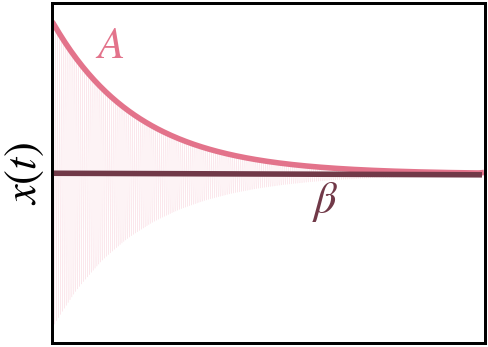

In [39]:
model.Get_Evolution(smooth_window = 1)

fig,ax = plt.subplots(1,1)
# plt.subplots_adjust(hspace = 0.1)
# ax.set_title(r"Evolution process $A(t)$ & $\beta(t)$")
ax.plot(t, WND_response[:,0],lw = 0.05,color = colors[0],label = "\epsilon = 1e-3")
ax.plot(model.t_evolutions[:],model.evolutions[0,0,:], color = colors[1],lw = 1)
ax.set_xlim(0,T)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel(r"$x(t)$",color = "black")
ax.text(100,1.5,"$A$", color = colors[1],fontsize = 8)
ax.text(600,-0.5,r"$\beta$", color = colors[2],fontsize = 8)
# ax.set_xlabel("Time")

ax2 = ax.twinx()
ax2.plot(model.t_evolutions[:-1],np.radians(model.evolutions[1,0,:-1]), lw = 1,color = colors[2],ls = "-")
ax2.set_xlim(0,T)
ax2.set_ylim(-np.pi/2,np.pi/2)
ax2.set_yticks([])
# ax2.set_yticklabels([r"$-\pi/2$","0",r"$\pi/2$"])
# ax2.set_ylabel(r"$\beta$",color = colors[2])
plt.savefig("Fig/Example1-2.svg",dpi = 300,transparent = True,bbox_inches="tight")
plt.show()


## 3. Transfer library from derivative space to evolutive space

It's difficult to find $\epsilon f(x,x')$ by just solving Eq.$(4)$. So we proposed evolution library transferring method to discovery the governing equation of weakly nonlinear dynamics.

When $\epsilon=0$, the solution of Eq.$(1)$ can be written as:
$$
x = A \sin(\omega_0 t+\beta) = A\sin(\phi) \tag{2}
$$
where $A,\beta$ are constants.

When $\epsilon \neq 0$, the solution of Eq.$(1)$ can be still be expressed in the form Eq.$(4)$ provided that $A$ and $\beta$ are considered to be functions of $t$ rather than constants.

The *Method of Average* can be used to solve Eq.$(1)$. The governing equation of $A$ and $\beta$ can be expressed as Eq.$(5.a), (5.b)$. 

$$
\dot{A} = -\frac{\epsilon}{2\pi \omega_0}\int_0^{2\pi} \cos(\phi)f(x,x')d\phi \tag{3.a}
$$

$$
\dot{\beta} = \frac{\epsilon}{2A\pi \omega_0}\int_0^{2\pi} \sin(\phi)f(x,x')d\phi \tag{3.b}
$$
where $x=A\sin(\phi)$ and $\dot{x}=A\omega_0 cos(\phi)$

**Now, we build the relationship bewteen original library $\Phi(x,x')$ and evolution equation$\dot{A}$, $\dot{\beta}$.**


$$
\hat{\Phi}_A=-\frac{1}{2\pi\omega_0}\int_0^{2\pi} \cos(\phi)\Phi(x,x')d\phi \tag{6.a}
$$

$$
\hat{\Phi}_{\beta}=\frac{1}{2A\pi \omega_0}\int_0^{2\pi} \sin(\phi)\Phi(x,x')d\phi \tag{6.b}
$$

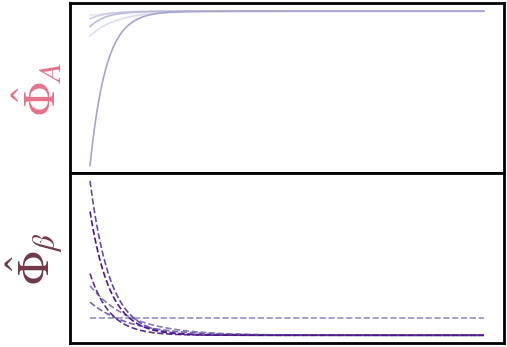

In [40]:
model.Library_rebuild()
fig,ax = plt.subplots(2,1)
plt.subplots_adjust(hspace = 0)

Titles = [r"$\hat{\Phi}_A$",r"$\hat{\Phi}_{\beta}$"]
# ax2 = ax.twinx()
lss = ['-','--']
c = 0
for i in range(2):
    for j in range(len(model.library)):
        if np.max(np.abs(model.Phi[:,i,j,0]))>1e-5:
            c += 1
            ax[i].plot(model.t_evolutions[:], model.Phi[:,i,j,0], color = Colors[c], ls = lss[i], lw = 0.3)
    # ax2.plot(model.t_evolutions, model.Phi[:,1,j,0], color = Colors[1][j+4], ls = '--', lw = 0.7)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
# ax[0].text(-200,-2,r"$\hat{\Phi}_A$",color = colors[1],fontsize = 5)
# ax[1].text(-200,0.5,r"$\hat{\Phi}_\beta$",color = colors[2],fontsize = 5)

ax2.set_yticks([])
ax[0].set_ylabel(r"$\hat{\Phi}_A$",color = colors[1])
ax[1].set_ylabel(r"$\hat{\Phi}_{\beta}$",color = colors[2])
plt.savefig("Fig/Example1-3.svg",dpi = 300,transparent = True,bbox_inches="tight")
# ax.set_

In [41]:
model.optimize(sparse_threshold = 1e-2,
               stop_tolerance = 1e-4,
               step_tolerance=  1e-4,
               smooth_window=1)
# print(model.Xi)
print(model)

x0'' + 2.000105e+00x0 + 1.020213e-02x0' = 0



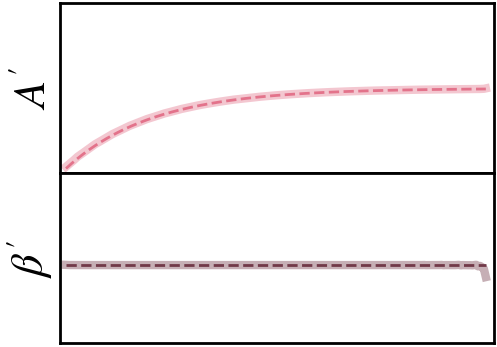

In [43]:
dt = model.t_evolutions[1] - model.t_evolutions[0]
fig,ax = plt.subplots(2,1)
plt.subplots_adjust(hspace = 0)
ax[0].plot(model.t_evolutions[2:-2],np.gradient(model.evolutions[0,0,:],dt,edge_order=2)[2:-2],  lw = 1.5,alpha = 0.4,color = colors[1],ls = "-",label = r"True $dA/dt$")
ax[0].plot(model.t_evolutions[2:-2],np.dot(model.Phi[2:-2,0,:,0],model.Xi[0]),  lw = 0.5,alpha = 1,color = colors[1],ls = "--",label = r"Fitting $dA/dt$")
ax[1].plot(model.t_evolutions[2:-2],np.gradient(model.evolutions[1,0,:],dt,edge_order=2)[2:-2],  lw = 1.5,alpha = 0.4,color = colors[2],ls = "-",label = r"True $d\beta/dt$")
ax[1].plot(model.t_evolutions[2:-2],np.dot(model.Phi[2:-2,1,:,0],model.Xi[0]),  lw = 0.5,alpha = 1,color = colors[2],ls = "--",label = r"Fitting $d\beta/dt$")
ax[0].set_ylim(-0.01,0.01)
ax[1].set_ylim(-0.01,0.01)
ax[0].set_ylabel(r"$A'$")
ax[1].set_ylabel(r"$\beta'$")
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xlim(0,T)
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].set_xlim(0,T)
# plt.legend(loc = "upper center", ncol = 2,fontsize = 5)
plt.savefig("Fig/Example1-4.svg",dpi = 300,transparent = True,bbox_inches="tight")

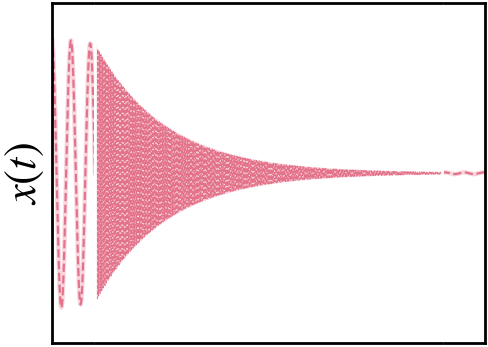

In [9]:
def WND_model(x,t):
    Phi = np.zeros(len(model.library))
    for i in range(len(model.library)):
        Phi[i] = model.library[i](x)
    dxdt = [x[1], -model.frequencys[0]**2*x[0]-np.sum(Phi*model.Xi[0])]
    return dxdt

WND_predict = odeint(WND_model, y0 = x0,t = t)
fig,ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_axis_off()
axins = inset_axes(ax, width="10%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.8,color = colors[0])
axins.plot(t, WND_predict[:,0],lw = 0.4,color = colors[1],ls = '--')
axins.set_xlim(0,10)
axins.set_ylabel(r"$x(t)$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-2.5,2.5)
axins.spines["right"].set_color("white")

axins = inset_axes(ax, width="10%", height="100%", loc='center left',
                   bbox_to_anchor=(0.9, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.8,color = colors[0])
axins.plot(t, WND_predict[:,0],lw = 0.4,color = colors[1], ls = '--')
axins.set_xlim(990,1000)
axins.set_ylim(-2.5,2.5)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="80%", height="100%", loc='center left',
                   bbox_to_anchor=(0.1, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.2,color = colors[0],label = "True")
axins.plot(t, WND_predict[:,0],lw = 0.2,color = colors[1], ls = '--', label = "Fitting")
axins.set_xlim(10,990)
axins.set_ylim(-2.5,2.5)
axins.set_yticks([])
# axins.set_xticks([250,500,750])
axins.set_xticks([])
axins.spines["left"].set_color("white")
axins.spines["right"].set_color("white")
# axins.set_xlabel("Time")
# plt.legend(loc = "upper right",ncol = 1,fontsize = 5)
plt.savefig("Fig/Example1-5.svg",dpi = 300,transparent = True,bbox_inches="tight")

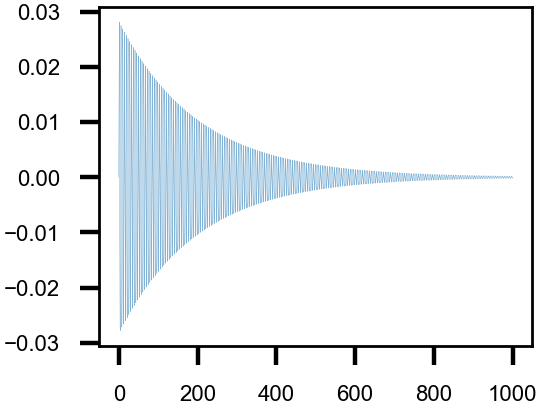

In [10]:
plt.plot(t,-WND_response[:,1]*0.01 , lw = 0.05)

In [11]:
def nonweak(x,t):
    dxdt = [x[1], -model.frequencys[0]**2*x[0]]
    return dxdt

Nonweak_predict = odeint(nonweak, y0 = x0,t = t)
error_our = WND_predict[:,0] - WND_response[:,0]
error_without = Nonweak_predict[:,0] - WND_response[:,0]

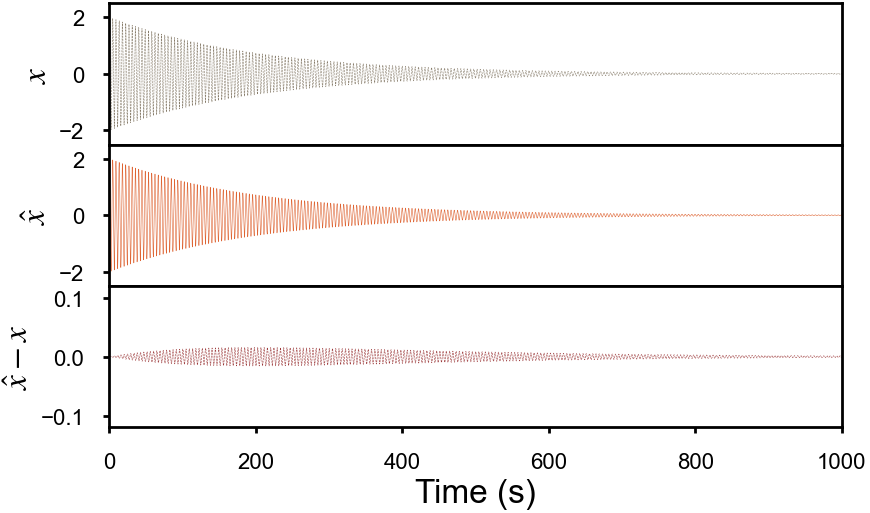

In [69]:
colors = ["#96b4c9", "#de6433", "#877c6a","#9b3738"]

# fig,ax = plt.subplots(2,1,figsize = (6/2.54,4/2.54),height_ratios=[3, 1])
# plt.subplots_adjust(wspace = 0.45,hspace = 0)
# plt.subplot(2,1,1)
# plt.plot(t, Nonweak_predict[:,0] , lw = 0.1, color = colors[0] , label = "Inferred dynamics $x$ without weak effect")
# plt.plot(t, WND_response[:,0], lw = 0.1, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.3),loc = 'upper center')
# plt.xlim(0,1000)
# plt.xticks([])
# plt.ylim(-2.5,2.5)
# # plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$x$")
# plt.subplot(2,1,2)
# plt.plot(t, Nonweak_predict[:,0] - WND_response[:,0], lw = 0.1, color = colors[3] , ls = '--', label = "Fitting error")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.265,5.25),loc = 'upper center')
# plt.xlim(0,1000)
# plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$\hat{x}-x$", fontsize = 7)
# plt.savefig("Fig/Supplementary/1-1.svg",dpi = 600,transparent = True,bbox_inches="tight")
# plt.savefig("Fig/Supplementary/1.svg",dpi = 600,transparent = True,bbox_inches="tight")
fig,axes = plt.subplots(3,1,figsize = (6/2.54,3.5/2.54),height_ratios=[1,1, 1])
for i in range(3):
    axes[i].tick_params(direction='out',width = 0.5,length = 1)
plt.subplots_adjust(wspace = 0.45,hspace = 0)
plt.subplot(3,1,1)
# plt.plot(t, WND_predict[:,0] , lw = 0.1, color = colors[1] , label = "Predicted $\hat{x}$")
plt.plot(t, WND_response[:,0], lw = 0.1, color = colors[2] , ls = '--')
# plt.legend(fontsize = 5, bbox_to_anchor = (0.4,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-2.5,2.5)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$x$", fontsize = 6)
plt.subplot(3,1,2)
plt.plot(t, WND_predict[:,0] , lw = 0.1, color = colors[1] , label = "Predicted $\hat{x}$")
# plt.plot(t, WND_response[:,0], lw = 0.1, color = colors[2] , ls = '--', label = "True $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.4,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-2.5,2.5)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$\hat{x}$", fontsize = 6)
plt.subplot(3,1,3)
plt.plot(t, WND_predict[:,0] - WND_response[:,0], lw = 0.1, color = colors[3] , ls = '--', label = "Predicting error $\hat{x}-x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.875,0.75),loc = 'upper center')
plt.xlim(0,1000)
plt.ylim(-0.12,0.12)
plt.xlabel("Time (s)", fontsize = 6)
plt.ylabel("$\hat{x}-x$", fontsize = 6)
plt.savefig("Fig/Supplementary/1-2.svg",dpi = 1200,transparent = True,bbox_inches="tight")
# plt.savefig("Fig/Supplementary/2.svg",dpi = 1200,transparent = True,bbox_inches="tight")

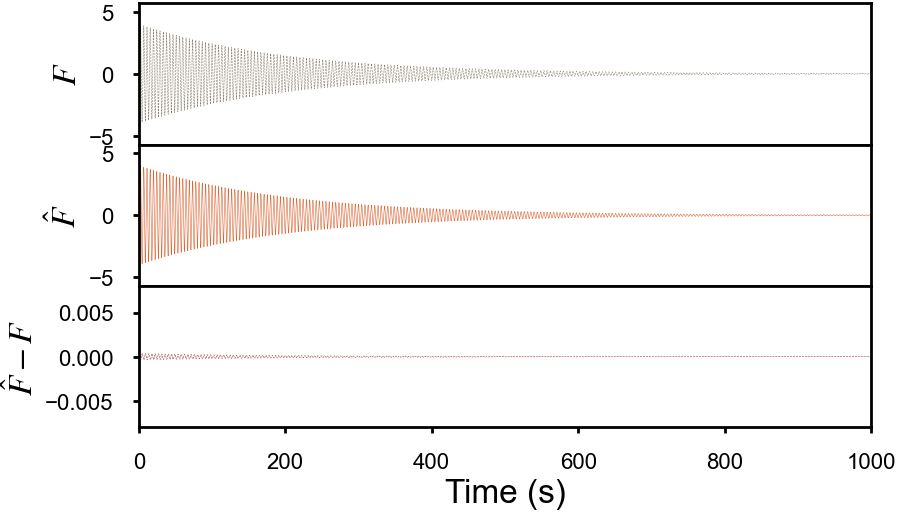

In [68]:

WND_derivative =  -WND_response[:,1]*0.01-2*WND_response[:,0]
pre_derivative = -1.999823*WND_response[:,0] - 1.003713e-2*WND_response[:,1]
nonweak_derivative = -1.999823*WND_response[:,0]


# fig,ax = plt.subplots(2,1,figsize = (6/2.54,4/2.54),height_ratios=[3, 1])
# plt.subplots_adjust(wspace = 0.45,hspace = 0)
# plt.subplot(2,1,1)
# plt.plot(t, nonweak_derivative , lw = 0.1, color = colors[0] , label = "Inferred derivate $\ddot{x}$ without weak effect")
# plt.plot(t, WND_derivative, lw = 0.1, color =  colors[2] , ls = '--', label = "True derivative $\ddot{x}$")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.3),loc = 'upper center')
# plt.xlim(0,1000)
# plt.xticks([])
# plt.ylim(-5.2,5.2)
# # plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$\ddot{x}$")
# plt.subplot(2,1,2)
# plt.plot(t, nonweak_derivative -WND_derivative, lw = 0.1, color = colors[3] , ls = '--', label = "Fitting error")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.28,5.25),loc = 'upper center')
# plt.xlim(0,1000)
# # plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$\hat{\ddot{x}}-\ddot{x}$", fontsize = 7)
# plt.savefig("Fig/Supplementary/1-3.svg",dpi = 600,transparent = True,bbox_inches="tight")
# plt.savefig("Fig/Supplementary/3.svg",dpi = 600,transparent = True,bbox_inches="tight")
fig,axes = plt.subplots(3,1,figsize = (6/2.54,3.5/2.54),height_ratios=[1,1, 1])
for i in range(3):
    axes[i].tick_params(direction='out',width = 0.5,length = 1)
plt.subplots_adjust(wspace = 0.45,hspace = 0)
plt.subplot(3,1,1)
# plt.plot(t, pre_derivative , lw = 0.1, color = colors[1] , label = "$\hat{\ddot{x}}$ calculated by Inferred equation")
plt.plot(t, WND_derivative, lw = 0.1, color =  colors[2] , ls = '--', label = "$\ddot{x}$ calculated by True equation")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.4,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-5.7,5.7)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$F$", fontsize = 6)
# fig,ax = plt.subplots(3,1,figsize = (6/2.54,4/2.54),height_ratios=[1, 1, 1])
plt.subplots_adjust(wspace = 0.45,hspace = 0)
plt.subplot(3,1,2)
plt.plot(t, pre_derivative , lw = 0.1, color = colors[1] , label = "$\hat{\ddot{x}}$ calculated by Inferred equation")
# plt.plot(t, WND_derivative, lw = 0.1, color =  colors[2] , ls = '--', label = "$\ddot{x}$ calculated by True equation")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.4,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-5.7,5.7)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$\hat{F}$", fontsize = 6)
plt.subplot(3,1,3)
plt.plot(t, pre_derivative -WND_derivative, lw = 0.1, color = colors[3] , ls = '--', label = "Fitting error")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.225,5.25),loc = 'upper center')
plt.xlim(0,1000)
plt.ylim(-0.008,0.008)
plt.xlabel("Time (s)", fontsize = 6)
plt.ylabel("$\hat{F}-F$", fontsize = 6)
plt.savefig("Fig/Supplementary/1-4.svg",dpi = 1200,transparent = True,bbox_inches="tight")
# plt.savefig("Fig/Supplementary/4.svg",dpi = 1200,transparent = True,bbox_inches="tight")

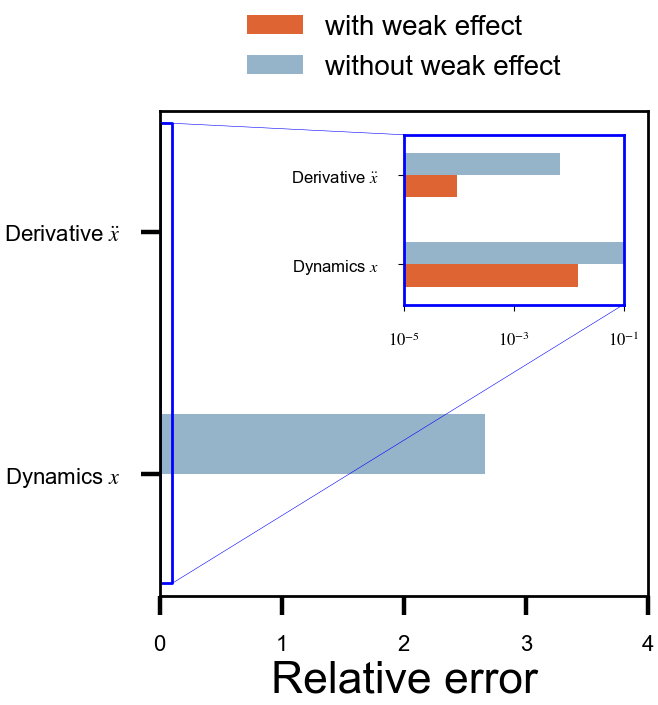

In [18]:
fig,ax = plt.subplots(figsize = (4/2.54,4/2.54))
DyE_with = np.linalg.norm(WND_response[:,0] - WND_predict[:,0])/np.linalg.norm(WND_response[:,0])
DyE_without = np.linalg.norm(WND_response[:,0] - Nonweak_predict[:,0])/np.linalg.norm(WND_response[:,0])
WND_derivative =  -WND_response[:,1]*0.01-2*WND_response[:,0]
pre_derivative = -1.999823*WND_response[:,0] - 1.003713e-2*WND_response[:,1]
nonweak_derivative = -1.999823*WND_response[:,0]
DeE_with = np.linalg.norm(WND_derivative - pre_derivative)/np.linalg.norm(WND_derivative)
DeE_without = np.linalg.norm(WND_derivative - nonweak_derivative)/np.linalg.norm(WND_derivative)
ax.barh(0.75, DyE_with, color = colors[1], height = 0.5, label = "with weak effect")
ax.barh(1.25, DyE_without, color = colors[0], height = 0.5, label = 'without weak effect')
ax.barh(2.75, DeE_with, color = colors[1],height = 0.5)
ax.barh(3.25, DeE_without, color = colors[0] ,height = 0.5)
# ax.set_yscale('log')
ax.set_yticks([1,3])
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_yticklabels(["Dynamics $x$", "Derivative $\ddot{x}$"])0
ax.set_xlabel("Relative error")
from matplotlib.patches import ConnectionPatch
tx0 = 1e-5
tx1 = 1e-1
ty0 = 0.1
ty1 = 3.9
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
ax.plot(sx,sy,"blue" ,lw = 0.5, ls = '-')


axins = ax.inset_axes((0.5, 0.6, 0.45, 0.35))
axins.spines['bottom'].set_color('blue') 
axins.spines['top'].set_color('blue')
axins.spines['left'].set_color('blue') 
axins.spines['right'].set_color('blue')
axins.barh(0.75, DyE_with, color = colors[1], height = 0.5, label = "with weak effect")
axins.barh(1.25, DyE_without, color = colors[0], height = 0.5, label = 'without weak effect')
axins.barh(2.75, DeE_with, color = colors[1],height = 0.5)

axins.barh(3.25, DeE_without, color = colors[0] ,height = 0.5)
axins.set_xlim(tx0,tx1)
# axins.set_yticks(fontsize = 3)
axins.set_xscale('log')
axins.set_yticks([1,3])
axins.set_xticks([1e-1,1e-3,1e-5])
axins.tick_params(which = "major", length = 1,width = 0.2)
axins.set_xticklabels(['$10^{-1}$','$10^{-3}$','$10^{-5}$'],fontsize = 3)
axins.set_ylim(ty0,ty1)
axins.set_yticklabels(["Dynamics $x$", "Derivative $\ddot{x}$"],fontsize = 3)

xy = (tx0,ty1)
xy2 = (tx0,ty1)
con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
        axesA=axins,axesB=ax, lw = 0.1 , color = 'blue')
axins.add_artist(con)
xy = (tx1,ty0)
xy2 = (tx1,ty0)

con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
        axesA=axins,axesB=ax, lw = 0.1 , color = 'blue')
axins.add_artist(con)


plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.25),loc = 'upper center')
plt.savefig("Fig/Supplementary/1-5.svg",dpi = 1200,transparent = True,bbox_inches="tight")
# plt.savefig("Fig/Supplementary/5.svg",dpi = 1200,transparent = True,bbox_inches="tight")

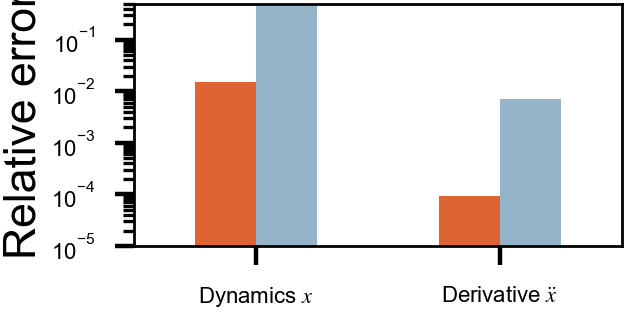

In [19]:
fig,ax = plt.subplots(figsize = (4/2.54,2/2.54))
DyE_with = np.linalg.norm(WND_response[:,0] - WND_predict[:,0])/np.linalg.norm(WND_response[:,0])
DyE_without = np.linalg.norm(WND_response[:,0] - Nonweak_predict[:,0])/np.linalg.norm(WND_response[:,0])
WND_derivative =  -WND_response[:,1]*0.01-2*WND_response[:,0]
pre_derivative = -1.999823*WND_response[:,0] - 1.003713e-2*WND_response[:,1]
nonweak_derivative = -1.999823*WND_response[:,0]
DeE_with = np.linalg.norm(WND_derivative - pre_derivative)/np.linalg.norm(WND_derivative)
DeE_without = np.linalg.norm(WND_derivative - nonweak_derivative)/np.linalg.norm(WND_derivative)
ax.bar(0.75, DyE_with, color = colors[1], width = 0.5, label = "with weak effect")
ax.bar(1.25, DyE_without, color = colors[0], width = 0.5, label = 'without weak effect')
ax.bar(2.75, DeE_with, color = colors[1],width = 0.5)
ax.bar(3.25, DeE_without, color = colors[0] ,width = 0.5)
ax.set_yscale('log')
ax.set_xticks([1,3])
ax.set_ylim(1e-5,5e-1)
ax.set_xlim(0,4)
ax.set_xticklabels(["Dynamics $x$", "Derivative $\ddot{x}$"])
ax.set_ylabel("Relative error")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.25),loc = 'upper center')
plt.savefig("Fig/Supplementary/6.png",dpi = 1200,transparent = True,bbox_inches="tight")
plt.savefig("Fig/Supplementary/6.svg",dpi = 600,transparent = True,bbox_inches="tight")